# Rechenaufgaben zu 5.3 (Recurrent Neural Networks)

---

## Rechenaufgabe 1

Sei ein Alphabet gegeben durch

$$
\Sigma=\{a,e,s,t\}
$$

**Aufgaben:**

1. Bestimmen Sie eine One-Hot-Codierung für $\Sigma$
2. Wie ist demnach das Wort 'test' codiert?


In [11]:
def encode(sigma: str):
    match sigma:
        case "a":
            return (1, 0, 0, 0)
        case "e":
            return (0, 1, 0, 0)
        case "s":
            return (0, 0, 1, 0)
        case "t":
            return (0, 0, 0, 1)


def encode_word(word: str):
    return tuple(encode(char) for char in word)


print(f"1.) one_hot(Sigma) = {encode_word('aest')}")
print(f"1.) one_hot('test') = {encode_word('test')}")

1.) one_hot(Sigma) = ((1, 0, 0, 0), (0, 1, 0, 0), (0, 0, 1, 0), (0, 0, 0, 1))
1.) one_hot('test') = ((0, 0, 0, 1), (0, 1, 0, 0), (0, 0, 1, 0), (0, 0, 0, 1))


## Rechenaufgabe 2

Gegeben sei das abgebildete einfache RNN

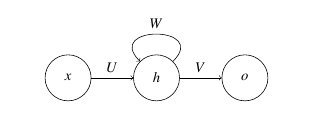

wobei

$$
\Sigma=\{\text{ist}, \text{nichts}, \text{niemand}\}=\{(1,0,0)^T,(0,1,0)^T,(0,0,1)^T\}
$$

$$
U=\begin{pmatrix}
0 & 0.9 & 0.9\\
0.5 & 0.1 & 0\\
0.5 & 0 & 0.1
\end{pmatrix}
$$

$$
W=\begin{pmatrix}
0 & 0.45 & 0.45\\
0.25 & 0.05 & 0\\
0.25 & 0 & 0.05
\end{pmatrix}
$$

$$
V=\begin{pmatrix}
0.5 & 0 & 0\\
0 & 0.5 & 0\\
0 & 0 & 0.5
\end{pmatrix}
$$

sowie

$$
h_0=(0,1,1)^T
$$


Als Aktivierungsfunktion wählen wir $h^\text{relu}$.

**Aufgabe:** Berechnen Sie die Hidden States und die Ausgabe für die Eingabe $x=\ \text{'Niemand ist'}\ =((0,0,1)^T,(1,0,0)^T)$.

In [47]:
from typing import Union
import numpy as np


def one_hot(x: str):
    match (x):
        case "ist":
            return (1, 0, 0)
        case "nichts":
            return (0, 1, 0)
        case "Niemand":
            return (0, 0, 1)


def argmax(lst: tuple):
    return lst.index(max(lst))


def one_hot_rev(x: tuple[int, int, int]):
    list_argmax = argmax(x)
    match (list_argmax):
        case 0:
            return "ist"
        case 1:
            return "nichts"
        case 2:
            return "Niemand"


def vec_relu(x: list[float]):
    return [relu(val) for val in x]


def relu(x: Union[float, list[float]]):
    if isinstance(x, list):
        return vec_relu(x)

    return max(0, x)


def matrix_vector_product(matrix: list[list[float]], vector: list[float]):
    result_vector = []
    for row in matrix:
        row_result = sum(
            row_entry * vec_entry for row_entry, vec_entry in zip(row, vector)
        )
        result_vector += [row_result]

    return result_vector


def vector_sum(vec_1, vec_2):
    return [val_1 + val_2 for val_1, val_2 in zip(vec_1, vec_2)]


U = [
    [0, 0.9, 0.9],
    [0.5, 0.1, 0],
    [0.5, 0, 0.1],
]

W = [
    [0, 0.45, 0.45],
    [0.25, 0.05, 0],
    [0.25, 0, 0.05],
]

V = [
    [0.5, 0, 0],
    [0, 0.5, 0],
    [0, 0, 0.5],
]

h_0 = [0, 1, 1]

input_vector_1 = one_hot("Niemand")
input_vector_2 = one_hot("ist")

h_1 = relu(
    vector_sum(matrix_vector_product(U, input_vector_1), matrix_vector_product(W, h_0))
)

o_1 = relu(matrix_vector_product(V, h_1))

h_2 = relu(
    vector_sum(matrix_vector_product(U, input_vector_2), matrix_vector_product(W, h_1))
)

o_2 = relu(matrix_vector_product(V, h_2))


def round_vec(lst: list[float]):
    return tuple(round(val, 3) for val in lst)


print(f"1.) h_1 = {round_vec(h_1)}")
print(f"2.) o_1 = {round_vec(o_1)}, also '{one_hot_rev(o_1)}'")
print(f"3.) h_2 = {round_vec(h_2)}")
print(f"4.) o_2 = {round_vec(o_2)}, also '{one_hot_rev(o_2)}'")

1.) h_1 = (1.8, 0.05, 0.15)
2.) o_1 = (0.9, 0.025, 0.075), also 'ist'
3.) h_2 = (0.09, 0.953, 0.958)
4.) o_2 = (0.045, 0.476, 0.479), also 'Niemand'
